In [1]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [2]:
%pwd
%cd ir_data\GL-06-50

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-50


### Load Raw Data

<AxesSubplot:xlabel='Relative Time'>

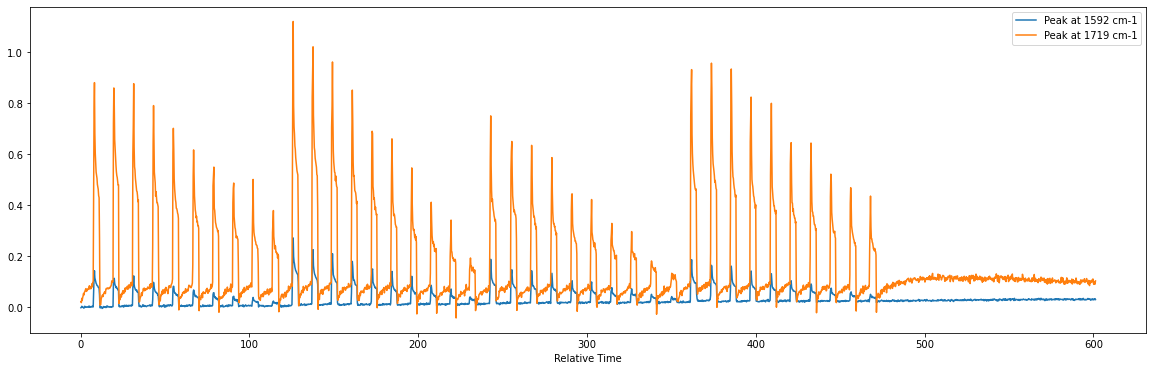

In [3]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [4]:
# List all the wavelengths observed
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1592 cm-1', 'Peak at 1719 cm-1']


In [5]:
# Choose peak
peak_of_interest = 'Peak at 1592 cm-1'

In [6]:
# Correct Baseline (if needed)
correction = Data.baseline_correction(ir_data[peak_of_interest])

ir_data[peak_of_interest] = ir_data[peak_of_interest] - correction

In [7]:
# Instantiate class
peaks = Peaks(ir_data)

# Auto find prominence and height to match number of conditions
prominence, no_reactions = peaks.auto_prom(peak_of_interest)
height = peaks.auto_height(peak_of_interest)
residence_time = peaks.auto_area(peak_of_interest, prominence, no_reactions, 10)

print('There are', no_reactions, 'reactions')
print('Prominence threshold =', np.round(prominence, 4))
print('Height threshold =', np.round(height, 4))
print('Residence time =', np.round(residence_time, 2))

There are 4 reactions
Prominence threshold = 0.0127
Height threshold = 1.0
Residence time = 4.44


,Prominence,Experimental Area,Fitted Area
0,-0.985887,-0.991813,-0.991518
1,-0.995616,-0.996640,-0.996739
2,-0.989332,-0.994777,-0.994957
3,-0.991171,-0.993095,-0.993083
Sum,-3.962007,-3.976325,-3.976297


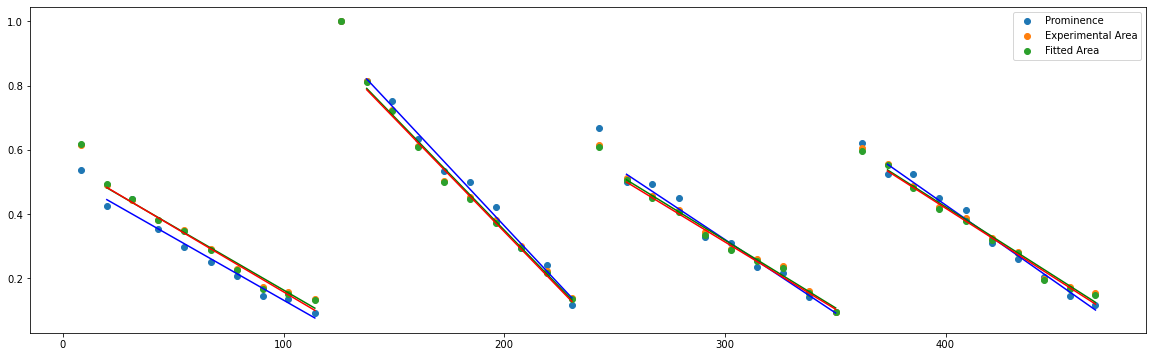

In [8]:
#residence_time=9
#prominence = 0.004
## PROMINENCE ALL WAVELENGTHS: Determine the peak prominences of every wavelength
#processed_ir_data = peaks.prominence_all(prominence)

## PROMINENCE: Determine the peak prominences of a single wavelength
#processed_ir_data = peaks.prominence(prominence, peak_of_interest)

## HEIGHT: # Determine the peak heights of a single wavelength
#processed_ir_data = peaks.height(height, peak_of_interest)

## EXP AREA: Determine the experimental areas of a single wavelength
#processed_ir_data = peaks.exp_area(prominence, residence_time, peak_of_interest)

## FITTED AREA - SINGLE PEAK: Fit a gaussian to a single peak and determine it's area
#processed_ir_data= peaks.fitted_area_sp(prominence, residence_time, peak_of_interest, 0, 2, 2)

## FITTED AREA: Determine the fitted areas of a single wavelength
#processed_ir_data = peaks.fitted_area(prominence, residence_time, peak_of_interest)

## Visualise which peaks have been picked - single peak
#peaks.plot(processed_ir_data, peak_of_interest)

## Compare prominence, height, experimental area, and fitted area
r2, compare = peaks.compare_no_height(prominence, residence_time, peak_of_interest, no_reactions, 10, 0, 3)
# NOTE: Areas seem to give the best value when the starting point is exactly on the peak (no baseline before)

#processed_ir_data
r2

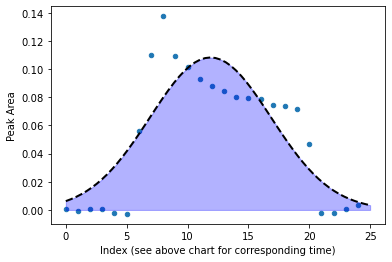

0


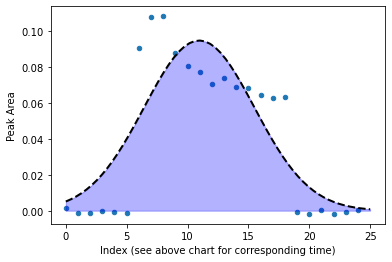

1


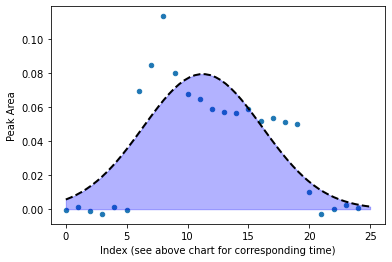

2


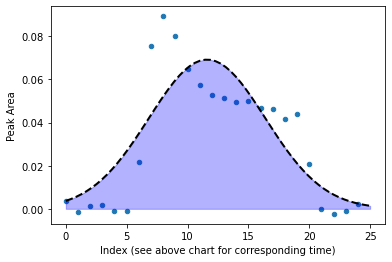

3


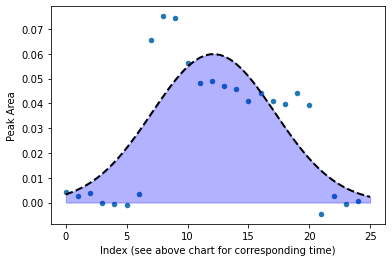

4


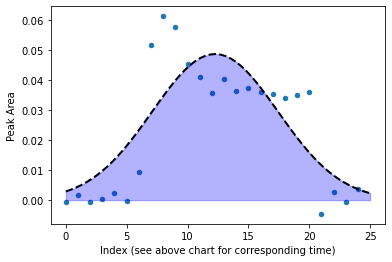

5


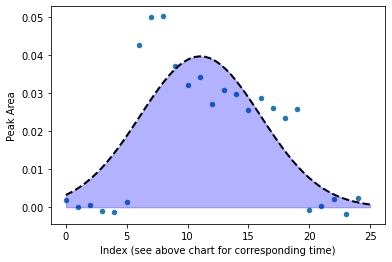

6


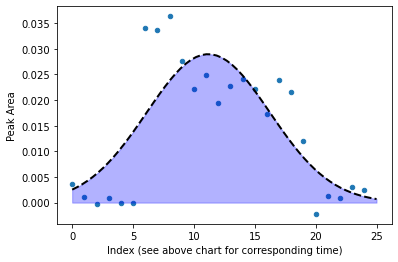

7


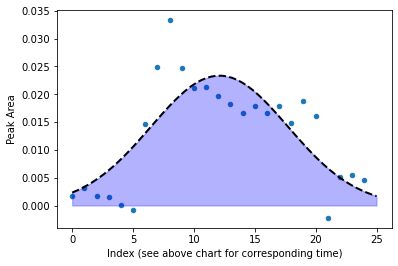

8


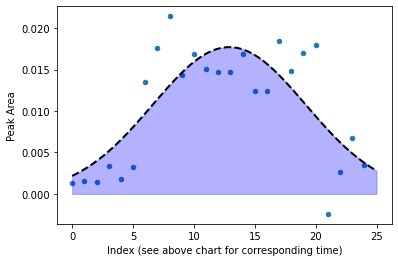

9


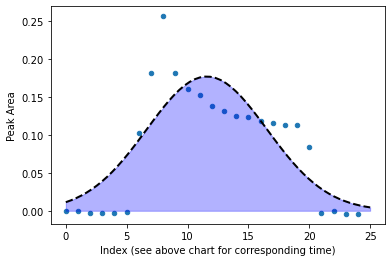

10


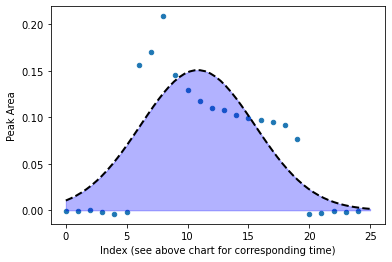

11


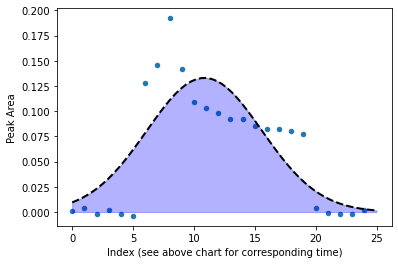

12


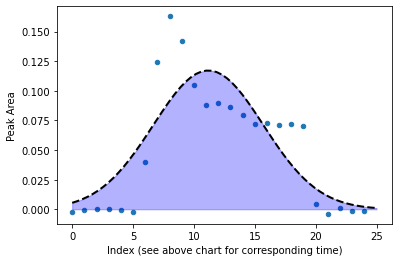

13


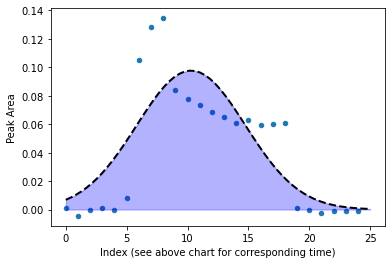

14


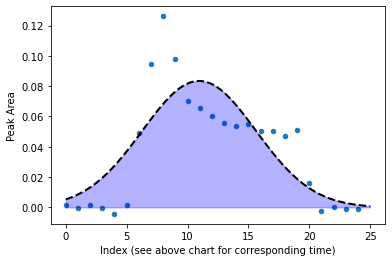

15


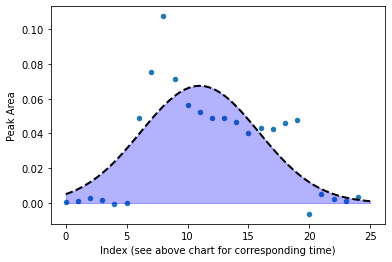

16


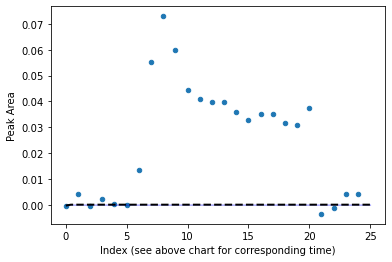

17


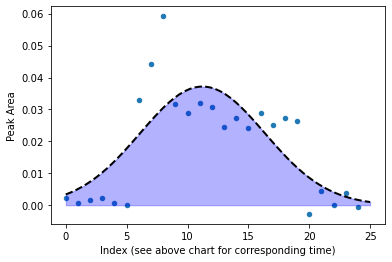

18


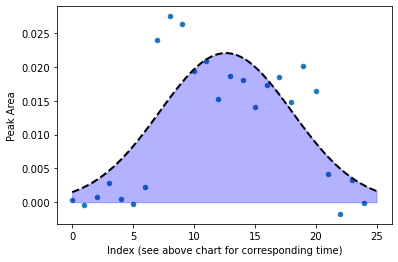

19


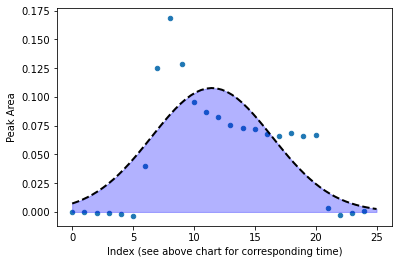

20


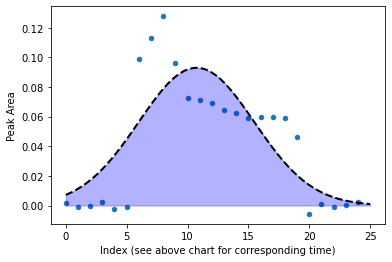

21


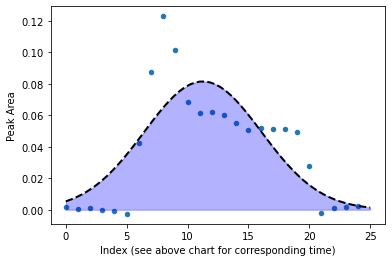

22


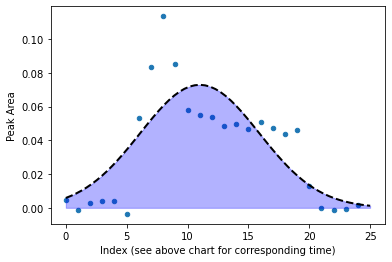

23


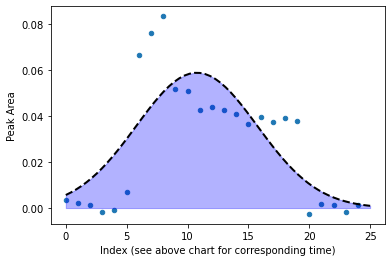

24


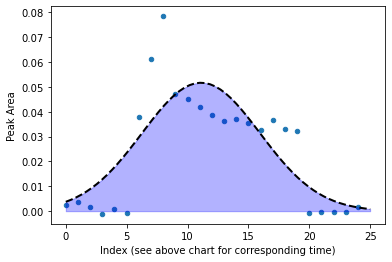

25


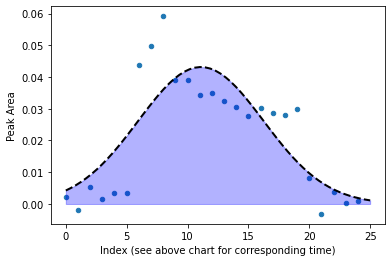

26


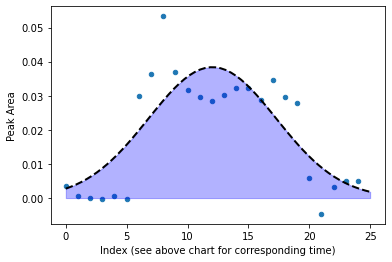

27


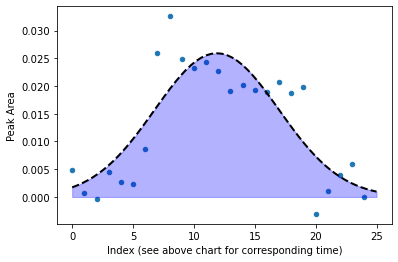

28


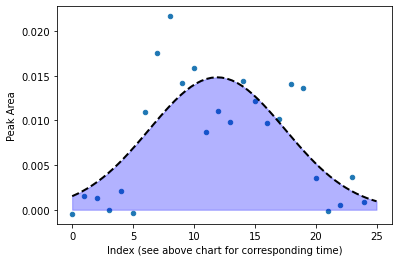

29


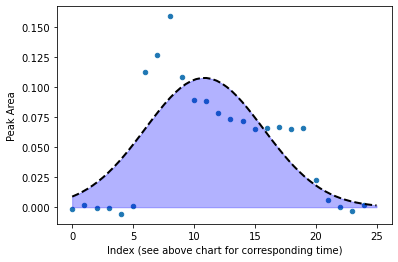

30


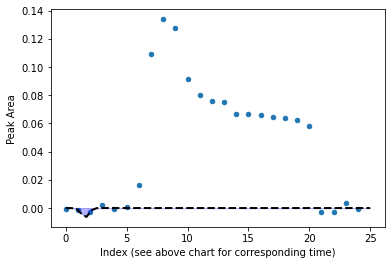

31


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


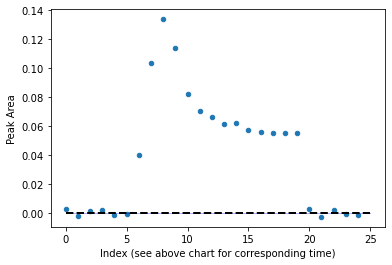

32


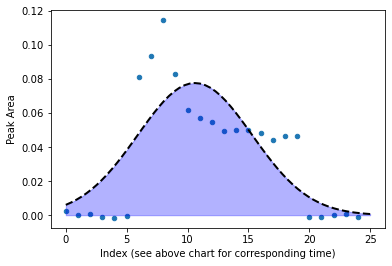

33


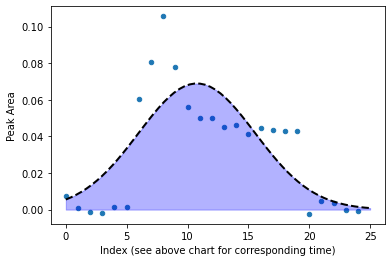

34


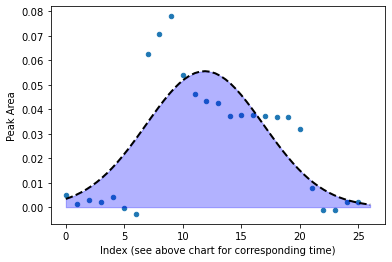

35


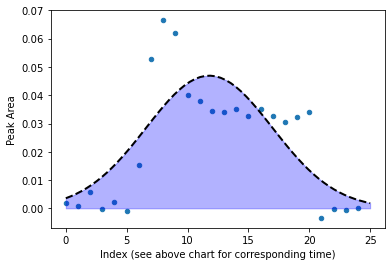

36


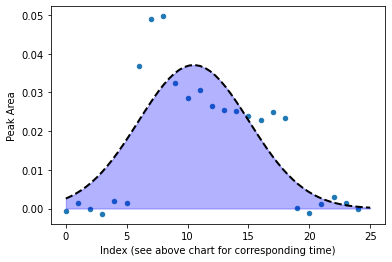

37


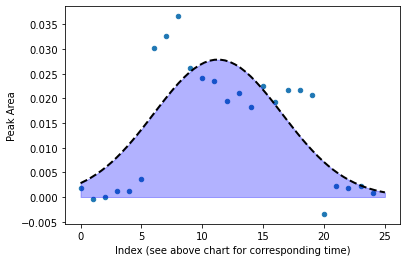

38


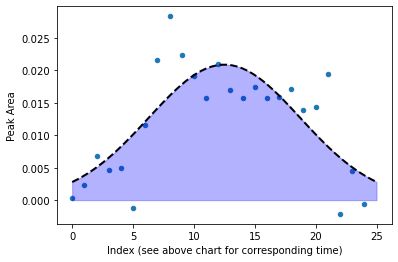

39


IndexError: list index out of range

In [9]:
for var in range(0,62):
    processed_ir_data = peaks.fitted_area_sp(prominence, residence_time, peak_of_interest, 0, 2, var)
    print(var)

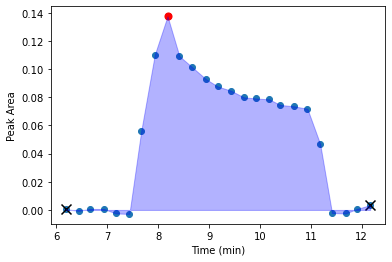

0


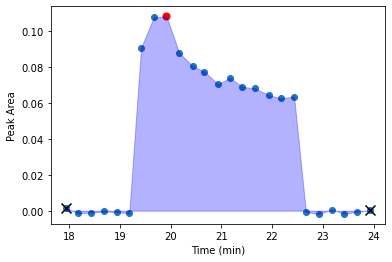

1


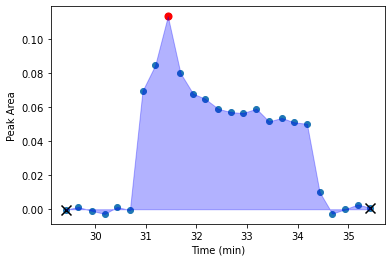

2


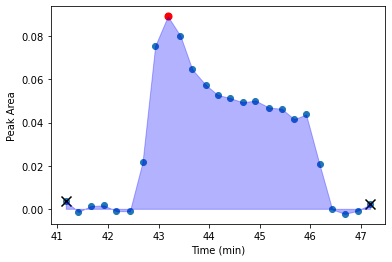

3


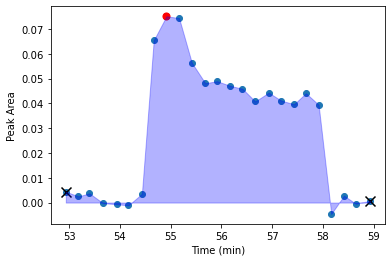

4


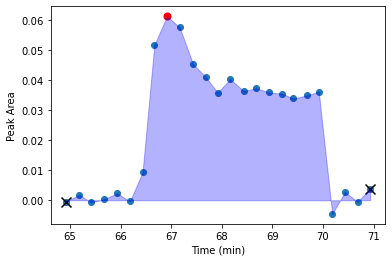

5


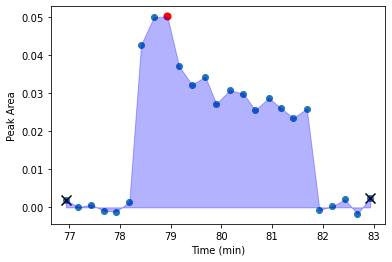

6


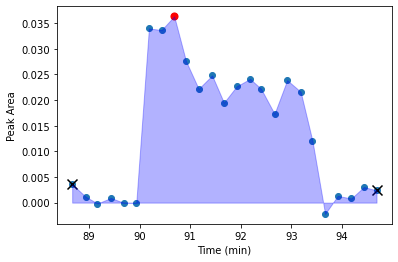

7


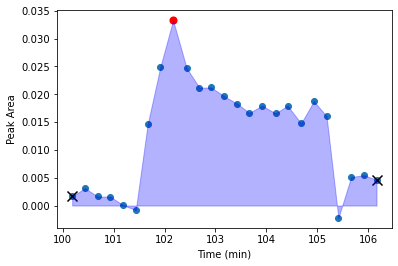

8


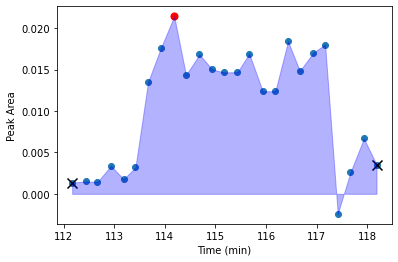

9


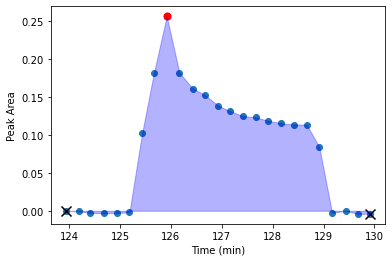

10


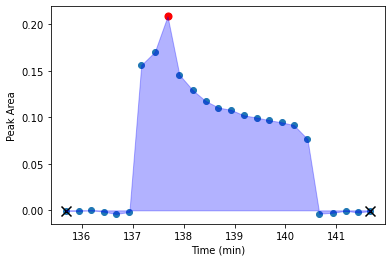

11


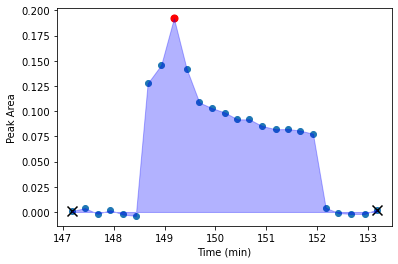

12


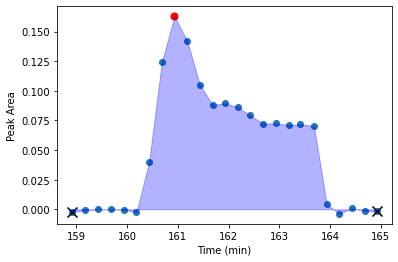

13


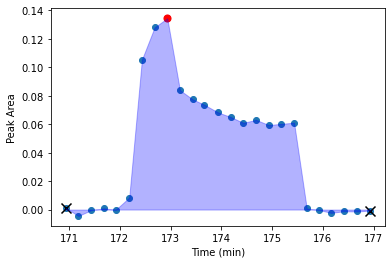

14


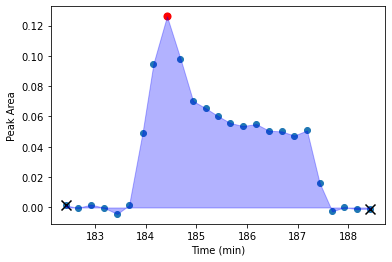

15


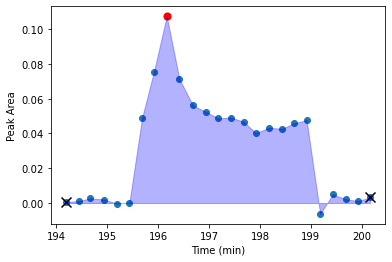

16


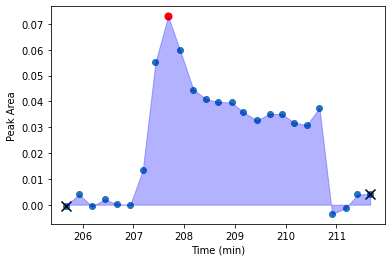

17


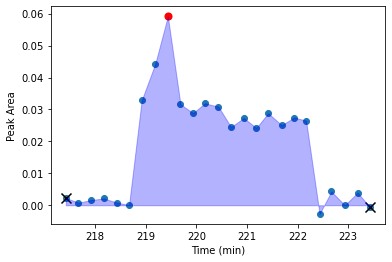

18


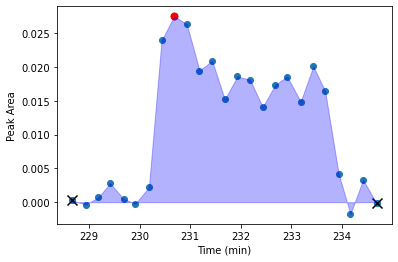

19


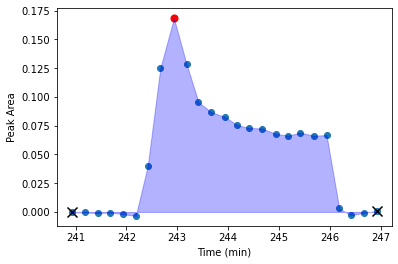

20


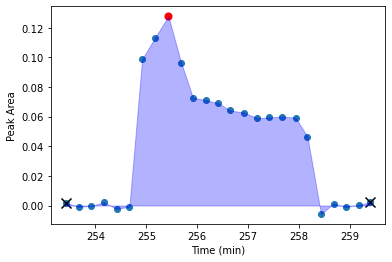

21


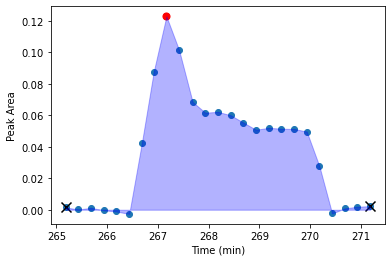

22


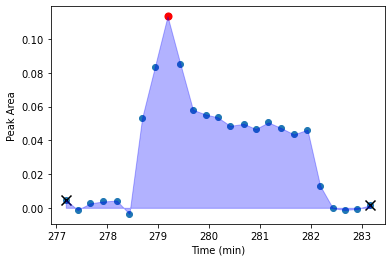

23


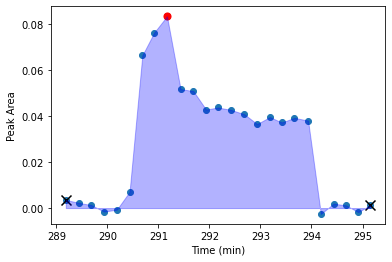

24


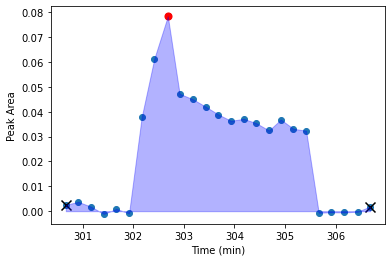

25


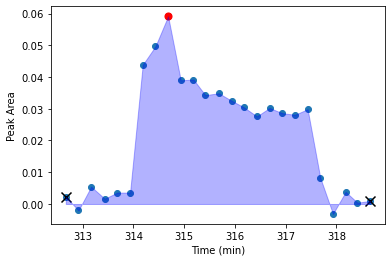

26


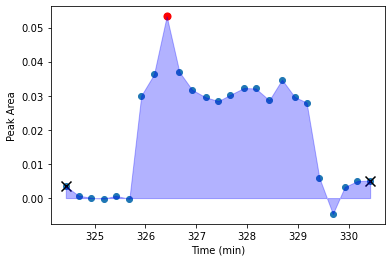

27


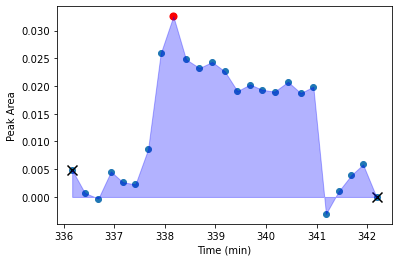

28


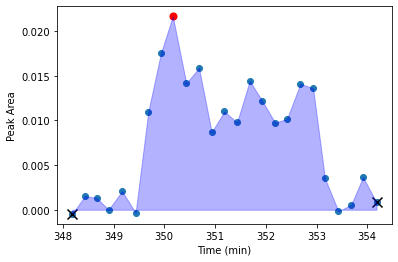

29


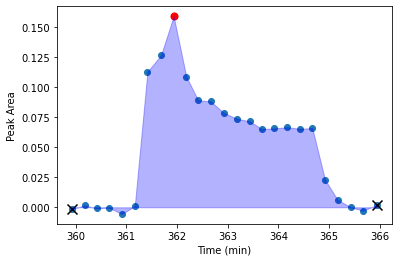

30


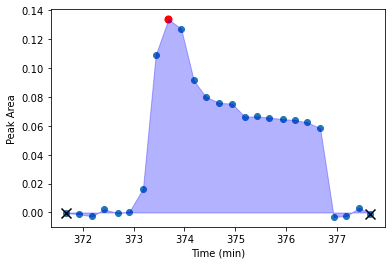

31


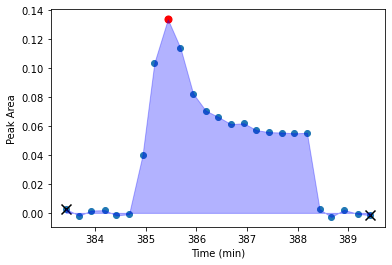

32


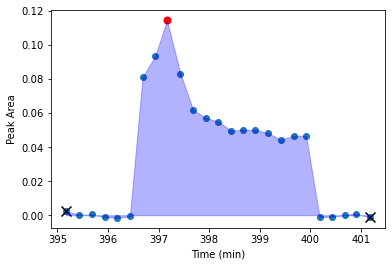

33


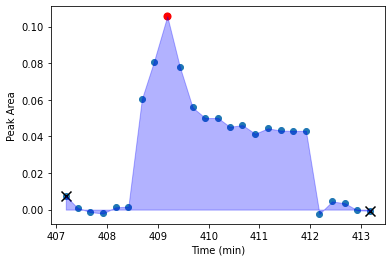

34


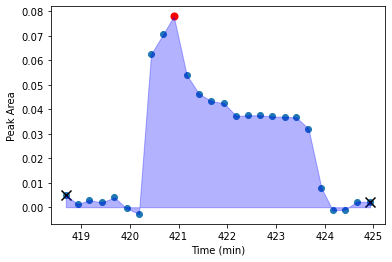

35


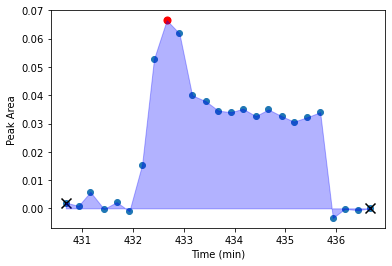

36


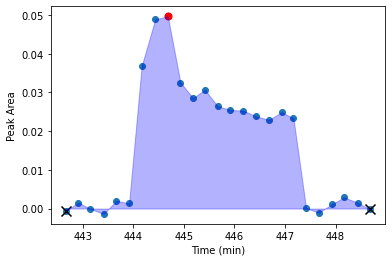

37


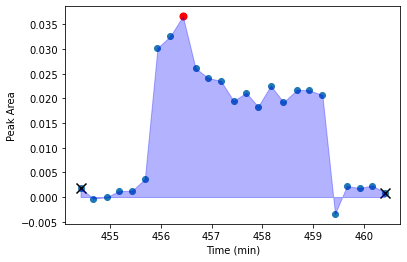

38


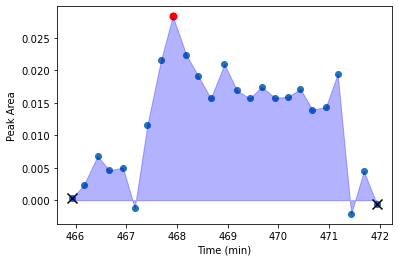

39


In [9]:
for var in range(0, 40):
    peaks.exp_area_sp(prominence, residence_time, peak_of_interest, 0, 2, var)
    print(var)

In [20]:
# Now in process_ir_data.py

def exp_area_sp(peak_threshold, residence_time, peak_of_interest, time_adjust_before = 0, time_adjust_after = 0, picked_peak = 0):

    x = ir_data[peak_of_interest]

    # Find peak height and position
    peaks = find_peaks(x, prominence = prominence)
    peak_prominence = peaks[1]
    peak_pos = ir_data['Relative Time'][peaks[0]]

    # Make it a list
    list_of_peaks = list(peak_pos)

    # Find a single peak
    single_peak = ir_data.loc[(ir_data['Relative Time'] >= list_of_peaks[picked_peak] - (residence_time/2 - time_adjust_before)) 
                            & (ir_data['Relative Time'] <= list_of_peaks[picked_peak] + (residence_time/2 + time_adjust_after))]

    # Find peak area of the experimental data
    exp_peak_area = np.trapz(single_peak[peak_of_interest])

    # Plot data
    plt.scatter(single_peak['Relative Time'], single_peak[peak_of_interest], label='Data')

    # Plot start and end points of integration
    int_thresh_x = (single_peak['Relative Time'].iloc[0], single_peak['Relative Time'].iloc[-1])
    int_thresh_y = (single_peak[peak_of_interest].iloc[0], single_peak[peak_of_interest].iloc[-1])

    plt.scatter(int_thresh_x, int_thresh_y, marker = 'x', s=100, color = 'black')

    # Plot Prominence point
    plt.scatter(peak_pos.iloc[picked_peak], single_peak[single_peak['Relative Time'] == peak_pos.iloc[picked_peak]][peak_of_interest], color = 'red', s = 50)

    # Fill integrated area
    plt.fill_between(single_peak['Relative Time'], single_peak[peak_of_interest],    
        #where = ((single_peak['Relative Time'] >= int_thresh_x[0]) & (single_peak['Relative Time'] <= int_thresh_x[1])),
        color='blue', alpha = 0.3)

    plt.xlabel("Time (min)")
    plt.ylabel("Peak Area")
    plt.show()

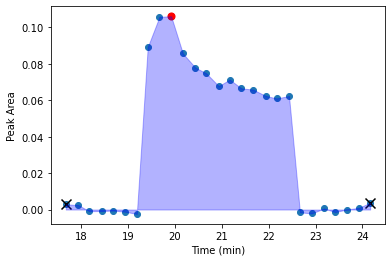

In [128]:
x = ir_data[peak_of_interest]

# Find peak height and position
peaks = find_peaks(x, prominence = prominence)
peak_prominence = peaks[1]
peak_pos = ir_data['Relative Time'][peaks[0]]

# Make it a list
list_of_peaks = list(peak_pos)

# To remove in function
picked_peak = 1
time_adjust_before = 2
time_adjust_after =0

# Find a single peak
single_peak = ir_data.loc[(ir_data['Relative Time'] >= list_of_peaks[picked_peak] - (residence_time - time_adjust_before)) 
                        & (ir_data['Relative Time'] <= list_of_peaks[picked_peak] + (residence_time + time_adjust_after))]

# Find peak area of the experimental data
exp_peak_area = np.trapz(single_peak[peak_of_interest])

# Plot data
plt.scatter(single_peak['Relative Time'], single_peak[peak_of_interest], label='Data')

# Plot start and end points of integration
int_thresh_x = (single_peak['Relative Time'].iloc[0], single_peak['Relative Time'].iloc[-1])
int_thresh_y = (single_peak[peak_of_interest].iloc[0], single_peak[peak_of_interest].iloc[-1])

plt.scatter(int_thresh_x, int_thresh_y, marker = 'x', s=100, color = 'black')

# Plot Prominence point
plt.scatter(peak_pos.iloc[picked_peak], single_peak[single_peak['Relative Time'] == peak_pos.iloc[picked_peak]][peak_of_interest], color = 'red', s = 50)

# Fill integrated area
plt.fill_between(single_peak['Relative Time'], single_peak[peak_of_interest],    
    where = ((single_peak['Relative Time'] >= int_thresh_x[0]) & (single_peak['Relative Time'] <= int_thresh_x[1])),
    color='blue', alpha = 0.3)

plt.xlabel("Time (min)")
plt.ylabel("Peak Area")
plt.show()

# Read experimental conditions and add to dataframe

In [10]:
Conditions()
experimental_data = Conditions.read(processed_ir_data)
#experimental_data

Inputs seem good: IR Datapoints =  40 , Number of conditions =  40


### Create the SPKA profiles

In [11]:
spka = SPKA(experimental_data)

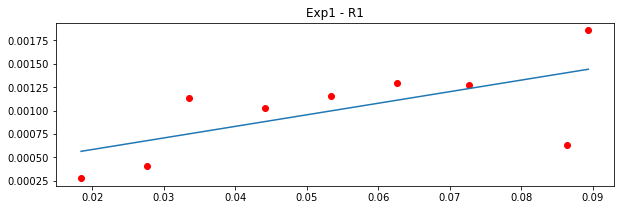

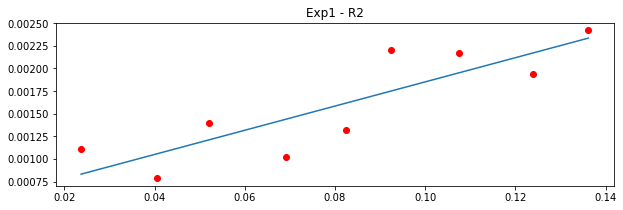

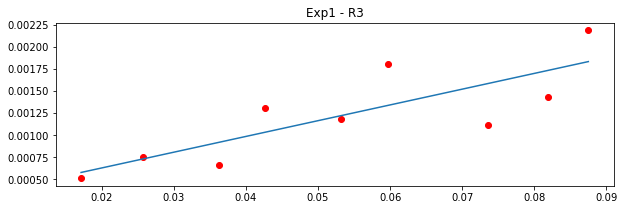

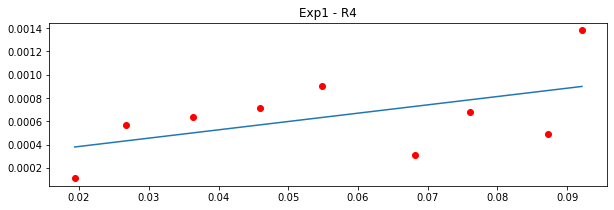

In [12]:
spka_data = spka.spka('[A]0')
spka_data
spka.plot(spka_data)

## To Compare - must use Conditions.read(compare)
#r2 = spka.compare('[A]0')
#r2

### Perform RPKA

In [13]:
rpka = RPKA(spka_data)

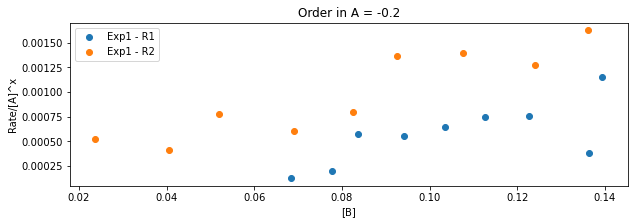

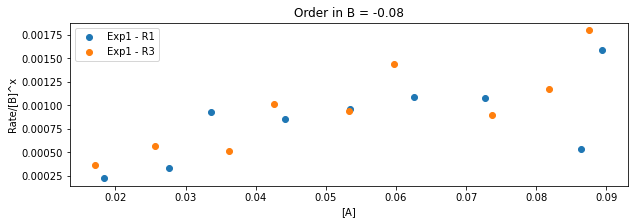

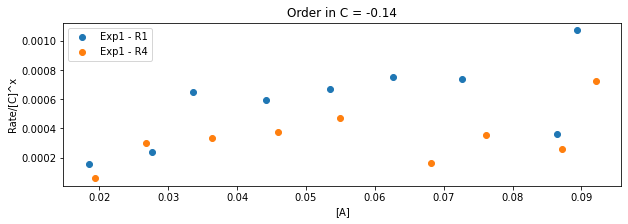

In [14]:
rpka_data = rpka.diff_excess()
#rpka_data

In [16]:
# Set up excelwriter
writer = pd.ExcelWriter('GL-06-50 - Processed - 1592 - Prominence.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
rpka_data.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
#writer.save()

# This won't work if the excel file is open